In [2]:
%matplotlib inline

# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
import math

Coordenadas cromaticas

In [16]:
def cromatics(input_image:np.ndarray) -> np.ndarray: 
    new_img = input_image.copy()
    h = input_image.shape[0]
    w = input_image.shape[1]
    scale = 1

    # loop over the image, pixel by pixel
    for y in range(0, h):
        for x in range(0, w):
            # pixel
            p = input_image[y, x]
            red = p[0]
            green = p[1]
            blue = p[2]
            
            new_red = (red * scale) / (red + green + blue)
            new_green = (green * scale) / (red + green + blue)
            new_blue = (blue * scale) / (red + green + blue)
            new_img[y, x] = [new_red, new_green, new_blue]

    # Clip trunca a lo que se le diga (0 a 255)
    np.clip(new_img, 0, 255, out = new_img)
    # Hay que castear a 8 bits   
    new_img = new_img.astype('uint8')         

    return new_img

In [17]:
img_color = cv.imread('segmentacion.png')
img = cv.imread('segmentacion.png',cv.COLOR_BGR2RGB)

/var/folders/s5/5nbwzy4127vdzvv2wpcsr6hj4mpngl/T/ipykernel_95232/3088338688.py:16: RuntimeWarning: overflow encountered in ubyte_scalars
  new_red = (red * scale) / (red + green + blue)
/var/folders/s5/5nbwzy4127vdzvv2wpcsr6hj4mpngl/T/ipykernel_95232/3088338688.py:17: RuntimeWarning: overflow encountered in ubyte_scalars
  new_green = (green * scale) / (red + green + blue)
/var/folders/s5/5nbwzy4127vdzvv2wpcsr6hj4mpngl/T/ipykernel_95232/3088338688.py:18: RuntimeWarning: overflow encountered in ubyte_scalars
  new_blue = (blue * scale) / (red + green + blue)
/var/folders/s5/5nbwzy4127vdzvv2wpcsr6hj4mpngl/T/ipykernel_95232/3088338688.py:16: RuntimeWarning: divide by zero encountered in long_scalars
  new_red = (red * scale) / (red + green + blue)
/var/folders/s5/5nbwzy4127vdzvv2wpcsr6hj4mpngl/T/ipykernel_95232/3088338688.py:17: RuntimeWarning: divide by zero encountered in long_scalars
  new_green = (green * scale) / (red + green + blue)
/var/folders/s5/5nbwzy4127vdzvv2wpcsr6hj4mpngl/T/i

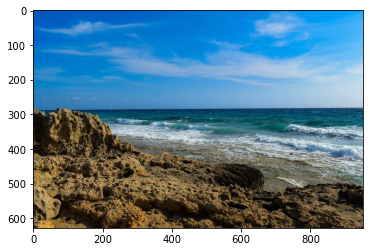

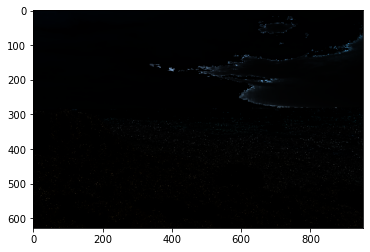

In [18]:
comatics_version = cromatics(img)
plt.imshow(img[:,:,::-1])
plt.show()

plt.imshow(comatics_version[:,:,::-1])
plt.show()

white-patch

In [6]:
def white_patch(input_image:np.ndarray) -> np.ndarray: 
    new_img = input_image.copy()
    h = input_image.shape[0]
    w = input_image.shape[1]
    scale = 10

    c1, c2, c3 = cv.split(img)

    max_red = max(c1.flatten())
    max_green = max(c2.flatten())
    max_blue = max(c3.flatten())

    red_factor = (255 / max_red) if max_red != 0 else 0
    green_factor = (255 / max_green) if max_green != 0 else 0
    blue_factor = (255 / max_blue) if max_blue != 0 else 0

    # loop over the image, pixel by pixel
    for y in range(0, h):
        for x in range(0, w):
            # pixel
            p = input_image[y, x]
            red = p[0]
            green = p[1]
            blue = p[2]
            
            new_red = math.floor(red * red_factor)
            new_green = math.floor(green * green_factor)
            new_blue = math.floor(blue * blue_factor)
            new_img[y, x] = [new_red, new_green, new_blue]

    # Clip trunca a lo que se le diga (0 a 255)
    np.clip(new_img, 0, 255, out = new_img)
    # Hay que castear a 8 bits   
    new_img = new_img.astype('uint8')         

    return new_img

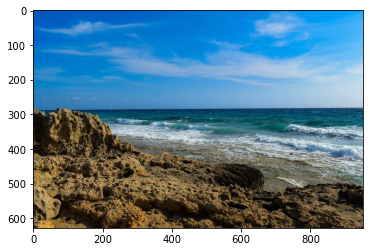

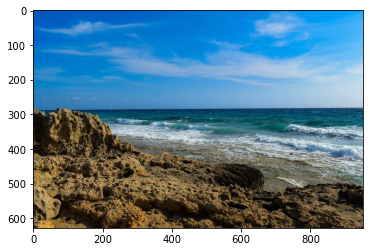

In [7]:
white_patch_version = white_patch(img)
plt.imshow(img[:,:,::-1])
plt.show()

plt.imshow(white_patch_version[:,:,::-1])
plt.show()

En white patch se multiplica cada canal por un numero menor o igual a 1, por lo que el resultado no puede superar los 255, sin embargo puede quedar flotante por lo que es necesario aplicar alguna técnica de redondeo. En mi caso utilicé el piso del numero flotante que resulta del producto. Podría darse que el maximo de un canal sea 0, lo que produciria una división por 0. En ese caso mantengo apagado ese canal.


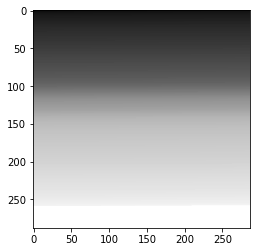

In [8]:
# Cargar una imagen en modo monocromático (un canal)
#img = cv.imread('imgBloque1.bmp',cv.IMREAD_GRAYSCALE)
#img_color = cv.imread('segmentacion.png')
img = cv.imread('img1_tp.png',cv.IMREAD_GRAYSCALE)

#cv.imshow('img', img)
#cv.waitKey(3000)

plt.imshow(img, cmap='gray')
plt.show()

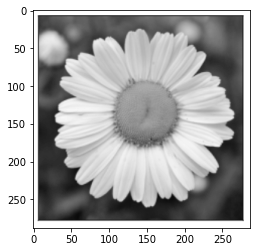

In [9]:
# Cargar una imagen en modo monocromático (un canal)
#img = cv.imread('imgBloque1.bmp',cv.IMREAD_GRAYSCALE)
#img_color = cv.imread('segmentacion.png')
img_2 = cv.imread('img2_tp.png',cv.IMREAD_GRAYSCALE)

#cv.imshow('img', img)
#cv.waitKey(3000)

plt.imshow(img_2, cmap='gray')
plt.show()

[  0.   25.5  51.   76.5 102.  127.5 153.  178.5 204.  229.5 255. ]


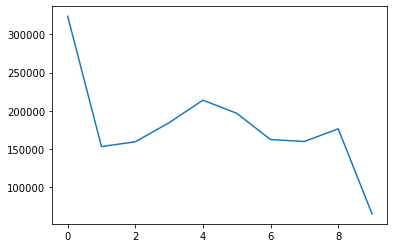

In [29]:
hist_1,bins1 = np.histogram(img.ravel(),10,[0,255])
print(bins1)
plt.plot(hist_1)


(array([323608., 153282., 159522., 184434., 213938., 196676., 162426.,
        159884., 176464.,  65218.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 [<matplotlib.patches.Polygon at 0x7fd0012ff700>])

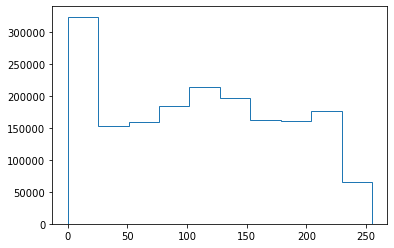

In [30]:
plt.hist(img.ravel(), bins=10, range=[0, 255], histtype='step')

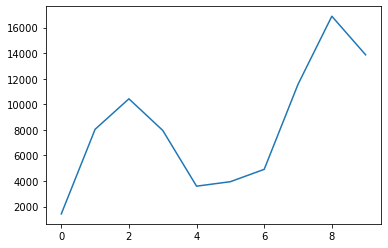

In [31]:
hist_2,bins2 = np.histogram(img_2.ravel(),10,[0,255])
plt.plot(hist_2)

(array([ 1432.,  8048., 10430.,  7959.,  3601.,  3951.,  4917., 11564.,
        16885., 13869.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 [<matplotlib.patches.Polygon at 0x7fcff1d24b50>])

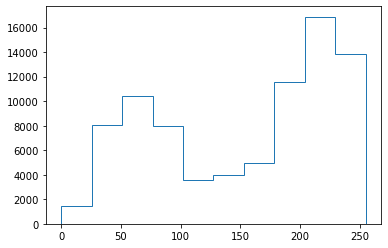

In [33]:
plt.hist(img_2.ravel(), bins=10, range=[0, 255], histtype='step')

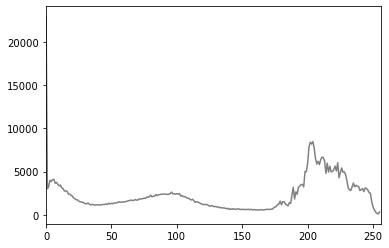

In [57]:
hist = cv.calcHist([img], [0], None, [256], [0, 256])

plt.plot(hist,color = 'grey')
plt.xlim([0,256])
plt.show()

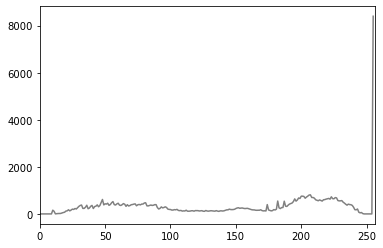

In [58]:
hist_2 = cv.calcHist([img_2], [0], None, [256], [0, 256])

plt.plot(hist_2,color = 'grey')
plt.xlim([0,256])
plt.show()

Se observa en la primer imagen una mayor cantidad de tonos oscuros y grises, y una baja cantidad de tonos claros. Se puede apreciar que la mayoria son grises.  Se ve una tendencia continua casi siempre decreciente desde tonos oscuros hasta tonos claros. En cuanto a la segunda imagen, se observan menos grises en la mitad del espectro, pero se observan dos picos de grises claros y oscuros. Esto da lugar a pensar que esta imagen es una captura de un objeto de la vida real dada la distribución de picos.

Creo que los histogramas dan información acerca de la imagen. La distribución en el mismo nos ayuda a detectar si una imagen sufrió alguna modificación digital, y además nos dá alguna idea de la distribución de colores en la misma. Según el problema, esta información puede ayudar, por lo que podrían ser considerados features en algún modelo.

In [78]:
img = cv.imread('segmentacion.png')
imgRGB = cv.cvtColor(img, cv.COLOR_BGR2RGB)

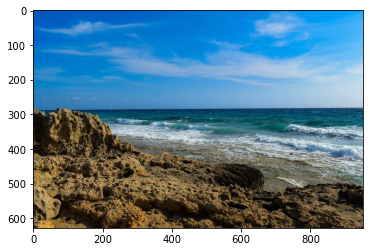

In [79]:
plt.imshow(imgRGB)
plt.show()

In [80]:
bgr_planes = cv.split(imgRGB)
histSize = 256
histRange = (0, 256) # the upper boundary is exclusive
accumulate = False
b_hist = cv.calcHist(bgr_planes, [0], None, [histSize], histRange, accumulate=accumulate)
g_hist = cv.calcHist(bgr_planes, [1], None, [histSize], histRange, accumulate=accumulate)
r_hist = cv.calcHist(bgr_planes, [2], None, [histSize], histRange, accumulate=accumulate)

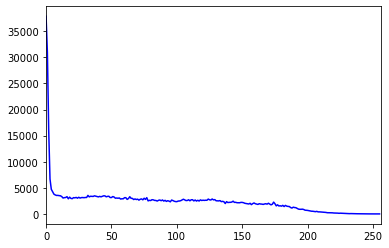

In [81]:
plt.plot(b_hist,color = 'b')
plt.xlim([0,256])
plt.show()

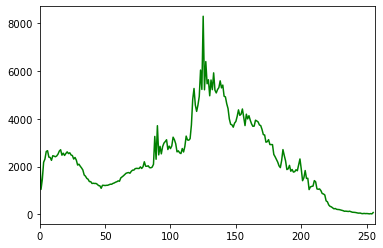

In [82]:
plt.plot(g_hist,color = 'g')
plt.xlim([0,256])
plt.show()

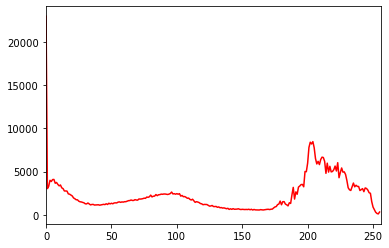

In [83]:
plt.plot(r_hist,color = 'r')
plt.xlim([0,256])
plt.show()

(array([0., 0., 0., 0., 1., 0., 1., 0., 0., 0.]),
 array([  0. ,  25.6,  51.2,  76.8, 102.4, 128. , 153.6, 179.2, 204.8,
        230.4, 256. ], dtype=float32),
 [<matplotlib.patches.Polygon at 0x7fd0020786a0>])

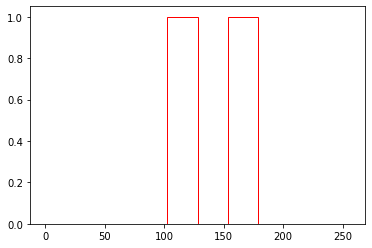

In [84]:
plt.hist(r_hist, bins=10, range=[0, 256], histtype='step', color='red')

(array([16.,  6.,  4.,  2.,  2.,  3.,  3.,  0.,  2.,  3.]),
 array([  0. ,  25.6,  51.2,  76.8, 102.4, 128. , 153.6, 179.2, 204.8,
        230.4, 256. ], dtype=float32),
 [<matplotlib.patches.Polygon at 0x7fd012846dc0>])

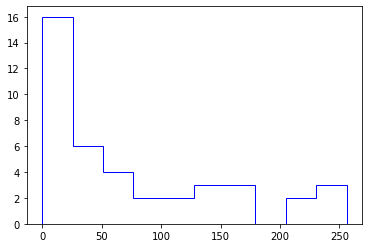

In [85]:
plt.hist(b_hist, bins=10, range=[0, 256], histtype='step', color='b')

(array([2., 8., 4., 3., 3., 3., 2., 3., 1., 2.]),
 array([  0. ,  25.6,  51.2,  76.8, 102.4, 128. , 153.6, 179.2, 204.8,
        230.4, 256. ], dtype=float32),
 [<matplotlib.patches.Polygon at 0x7fd0020f8a00>])

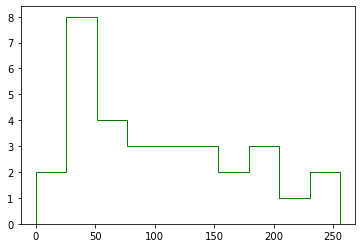

In [86]:
plt.hist(g_hist, bins=10, range=[0, 256], histtype='step', color='g')

Se ve una gran cantidad de azules claros, algo de verde y algo de rojo atribuibles a la parte de rocas

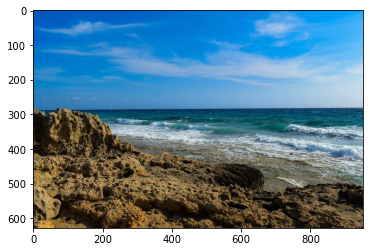

In [88]:
plt.imshow(imgRGB)
plt.show()

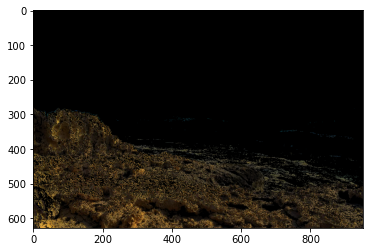

In [140]:
## Mascara donde predominan los rojos y verdes para separar las rocas/tierra
mask1 = cv.inRange(imgRGB, (10, 10, 0), (255, 255,75))

target = cv.bitwise_and(imgRGB,imgRGB, mask=mask1)

plt.imshow(target)
plt.show()

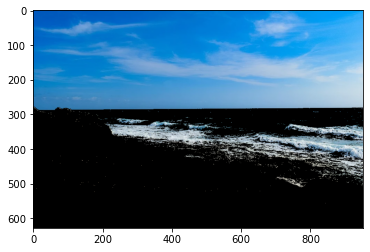

In [151]:
## Mascara donde predominan el azul para separar cielo y agua
mask1 = cv.inRange(imgRGB, (0, 0, 155), (255, 255,255))

target = cv.bitwise_and(imgRGB,imgRGB, mask=mask1)

plt.imshow(target)
plt.show()

Usando promedio y desvio del color

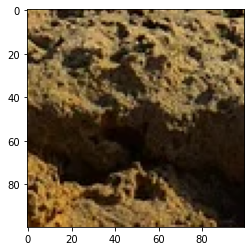

In [166]:
img_muestra_rocas = imgRGB[500:600,300:400,:]
plt.figure(2)
plt.imshow(img_muestra_rocas)
plt.show()

[90.21600000000001, 69.504, 39.8941]
[59.01783581257448, 51.82767777934875, 36.91991718828741]


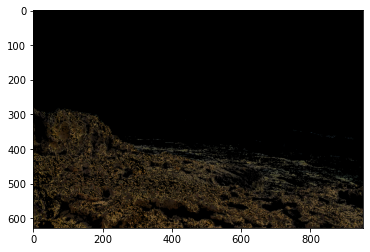

<function matplotlib.pyplot.show(close=None, block=None)>

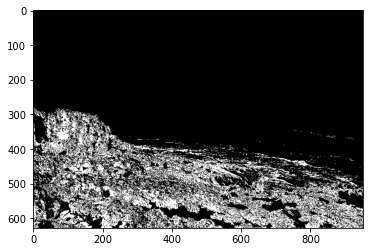

In [171]:
color_mean, color_std = cv.meanStdDev(img_muestra_rocas)
print(color_mean.flatten().tolist())
print(color_std.flatten().tolist())
n_sigma = 1
mask = cv.inRange(imgRGB, color_mean-color_std * n_sigma,  color_mean+color_std * n_sigma)
img_segmentada = cv.bitwise_and(imgRGB, imgRGB, mask=mask)

plt.figure(3)
plt.imshow(img_segmentada)
plt.show()

plt.figure(4)
plt.imshow(mask,cmap='gray')
plt.show

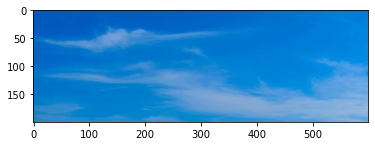

In [181]:
img_muestra_cielo = imgRGB[0:200,0:600,:]
plt.figure(2)
plt.imshow(img_muestra_cielo)
plt.show()

[28.961325000000002, 130.38890833333335, 207.91580833333333]
[41.3118364303062, 20.600695181836187, 9.146904035242468]


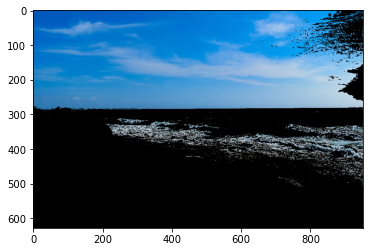

<function matplotlib.pyplot.show(close=None, block=None)>

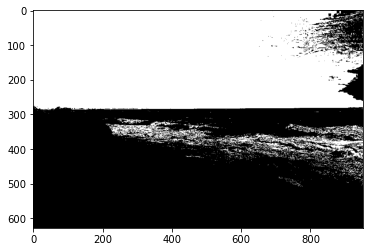

In [184]:
color_mean, color_std = cv.meanStdDev(img_muestra_cielo)
print(color_mean.flatten().tolist())
print(color_std.flatten().tolist())
n_sigma = 4
mask = cv.inRange(imgRGB, color_mean-color_std * n_sigma,  color_mean+color_std * n_sigma)
img_segmentada = cv.bitwise_and(imgRGB, imgRGB, mask=mask)

plt.figure(3)
plt.imshow(img_segmentada)
plt.show()

plt.figure(4)
plt.imshow(mask,cmap='gray')
plt.show

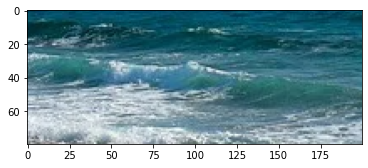

In [214]:
img_muestra_agua = imgRGB[300:380,400:600,:]
plt.figure(2)
plt.imshow(img_muestra_agua)
plt.show()

[81.7026875, 126.155125, 138.547125]
[66.4066368503732, 47.8427926780448, 45.92148494152141]


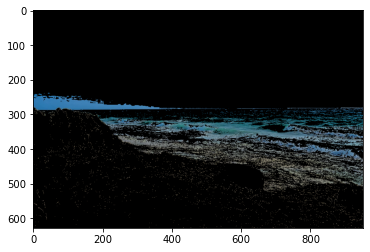

<function matplotlib.pyplot.show(close=None, block=None)>

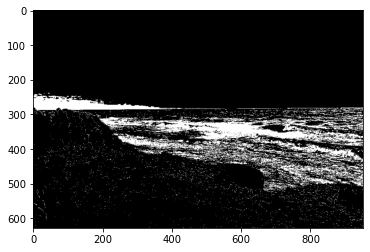

In [215]:
color_mean, color_std = cv.meanStdDev(img_muestra_agua)
print(color_mean.flatten().tolist())
print(color_std.flatten().tolist())
n_sigma = 1
mask = cv.inRange(imgRGB, color_mean-color_std * n_sigma,  color_mean+color_std * n_sigma)
img_segmentada = cv.bitwise_and(imgRGB, imgRGB, mask=mask)

plt.figure(3)
plt.imshow(img_segmentada)
plt.show()

plt.figure(4)
plt.imshow(mask,cmap='gray')
plt.show

Separo cielo y agua

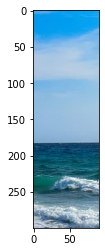

In [266]:
img_muestra_cielo_agua = imgRGB[100:400,700:790,:]
plt.figure(2)
plt.imshow(img_muestra_cielo_agua)
plt.show()

[102.98503703703703, 158.80037037037036, 192.10444444444445]
[66.06390731847317, 45.8258547419008, 52.9762069118338]


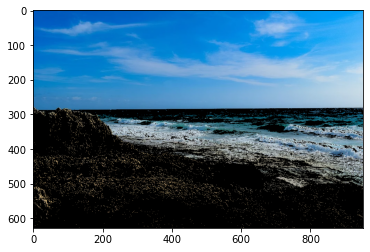

<function matplotlib.pyplot.show(close=None, block=None)>

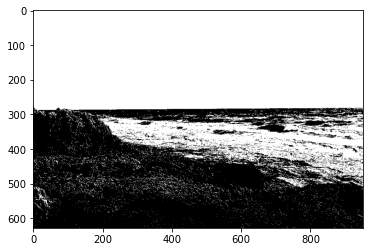

In [273]:
color_mean, color_std = cv.meanStdDev(img_muestra_cielo_agua)
print(color_mean.flatten().tolist())
print(color_std.flatten().tolist())
n_sigma = 1.6
mask = cv.inRange(imgRGB, color_mean-color_std * n_sigma,  color_mean+color_std * n_sigma)
img_segmentada = cv.bitwise_and(imgRGB, imgRGB, mask=mask)

plt.figure(3)
plt.imshow(img_segmentada)
plt.show()

plt.figure(4)
plt.imshow(mask,cmap='gray')
plt.show